### import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/naveen/PRSA_data_2010.1.1-2014.12.31.csv")

In [4]:
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In [5]:
df.shape

(43824, 13)

In [6]:
df.describe()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
count,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,41757.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000,43824.000000
mean,21912.500000,2012.000000,6.523549,15.727820,11.500000,98.613215,1.817246,12.448521,1016.447654,23.889140,0.052734,0.194916
std,12651.043435,1.413842,3.448572,8.799425,6.922266,92.050387,14.433440,12.198613,10.268698,50.010635,0.760375,1.415867
min,1.000000,2010.000000,1.000000,1.000000,0.000000,0.000000,-40.000000,-19.000000,991.000000,0.450000,0.000000,0.000000
25%,10956.750000,2011.000000,4.000000,8.000000,5.750000,29.000000,-10.000000,2.000000,1008.000000,1.790000,0.000000,0.000000
50%,21912.500000,2012.000000,7.000000,16.000000,11.500000,72.000000,2.000000,14.000000,1016.000000,5.370000,0.000000,0.000000
75%,32868.250000,2013.000000,10.000000,23.000000,17.250000,137.000000,15.000000,23.000000,1025.000000,21.910000,0.000000,0.000000
max,43824.000000,2014.000000,12.000000,31.000000,23.000000,994.000000,28.000000,42.000000,1046.000000,585.600000,27.000000,36.000000


In [7]:
df.isnull().sum()

No          0
year        0
month       0
day         0
hour        0
pm2.5    2067
DEWP        0
TEMP        0
PRES        0
cbwd        0
Iws         0
Is          0
Ir          0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43824 entries, 0 to 43823
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No      43824 non-null  int64  
 1   year    43824 non-null  int64  
 2   month   43824 non-null  int64  
 3   day     43824 non-null  int64  
 4   hour    43824 non-null  int64  
 5   pm2.5   41757 non-null  float64
 6   DEWP    43824 non-null  int64  
 7   TEMP    43824 non-null  float64
 8   PRES    43824 non-null  float64
 9   cbwd    43824 non-null  object 
 10  Iws     43824 non-null  float64
 11  Is      43824 non-null  int64  
 12  Ir      43824 non-null  int64  
dtypes: float64(4), int64(8), object(1)
memory usage: 4.3+ MB


In [9]:
df.duplicated().value_counts()

False    43824
Name: count, dtype: int64

In [10]:
df.describe(include = "object")

,cbwd
count,43824
unique,4
top,SE
freq,15290


In [11]:
from pandas import read_csv
from datetime import datetime

In [12]:
df.drop(['No'],axis=1,inplace=True)

In [13]:
df

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [14]:
df['pm2.5'].fillna(0,inplace=True)

/tmp/ipykernel_33/461810712.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['pm2.5'].fillna(0,inplace=True)


In [15]:
df

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010,1,1,0,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010,1,1,1,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010,1,1,2,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010,1,1,3,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010,1,1,4,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
43819,2014,12,31,19,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014,12,31,20,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014,12,31,21,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014,12,31,22,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [16]:
df.isnull().sum()

year     0
month    0
day      0
hour     0
pm2.5    0
DEWP     0
TEMP     0
PRES     0
cbwd     0
Iws      0
Is       0
Ir       0
dtype: int64

In [17]:
categorical_columns=[]
for i in df.columns:
  if df[i].dtype=='O':
    categorical_columns.append(i)

categorical_columns


['cbwd']

In [18]:
numarical_columns=[]
for i in df.columns:
  if df[i].dtype!='O':
    numarical_columns.append(i)

numarical_columns

['year',
 'month',
 'day',
 'hour',
 'pm2.5',
 'DEWP',
 'TEMP',
 'PRES',
 'Iws',
 'Is',
 'Ir']

In [19]:
from datetime import datetime
df['datetime'] = pd.to_datetime(df[['year', 'month', 'day','hour']])
df.head()

,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,2010,1,1,0,0.0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,2010,1,1,1,0.0,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,2010,1,1,2,0.0,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,2010,1,1,3,0.0,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,2010,1,1,4,0.0,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [20]:
df.drop(['year','month','day','hour'],axis=1,inplace=True)

In [21]:
df.head()

,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir,datetime
0,0.0,-21,-11.0,1021.0,NW,1.79,0,0,2010-01-01 00:00:00
1,0.0,-21,-12.0,1020.0,NW,4.92,0,0,2010-01-01 01:00:00
2,0.0,-21,-11.0,1019.0,NW,6.71,0,0,2010-01-01 02:00:00
3,0.0,-21,-14.0,1019.0,NW,9.84,0,0,2010-01-01 03:00:00
4,0.0,-20,-12.0,1018.0,NW,12.97,0,0,2010-01-01 04:00:00


In [22]:
columns = df.columns.tolist()

# Move the last column to the first position
columns = [columns[-1]] + columns[:-1]

# Reorder the DataFrame columns
df = df[columns]

In [23]:
df

,datetime,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
1,2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2,2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
3,2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
4,2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...,...
43819,2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
43820,2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
43821,2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0
43822,2014-12-31 22:00:00,8.0,-22,-4.0,1034.0,NW,246.72,0,0


In [24]:
# drop the first 24 hours
dataset = df[24:]

In [25]:
dataset.head()

,datetime,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
24,2010-01-02 00:00:00,129.0,-16,-4.0,1020.0,SE,1.79,0,0
25,2010-01-02 01:00:00,148.0,-15,-4.0,1020.0,SE,2.68,0,0
26,2010-01-02 02:00:00,159.0,-11,-5.0,1021.0,SE,3.57,0,0
27,2010-01-02 03:00:00,181.0,-7,-5.0,1022.0,SE,5.36,1,0
28,2010-01-02 04:00:00,138.0,-7,-5.0,1022.0,SE,6.25,2,0


In [26]:
# manually specify column names
df.set_index('datetime',inplace=True)
df.columns = ['pollution', 'dew', 'temp', 'press', 'wnd_dir', 'wnd_spd', 'snow', 'rain']


In [27]:
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
datetime,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [28]:

from pandas import read_csv
from matplotlib import pyplot

# specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
i = 1

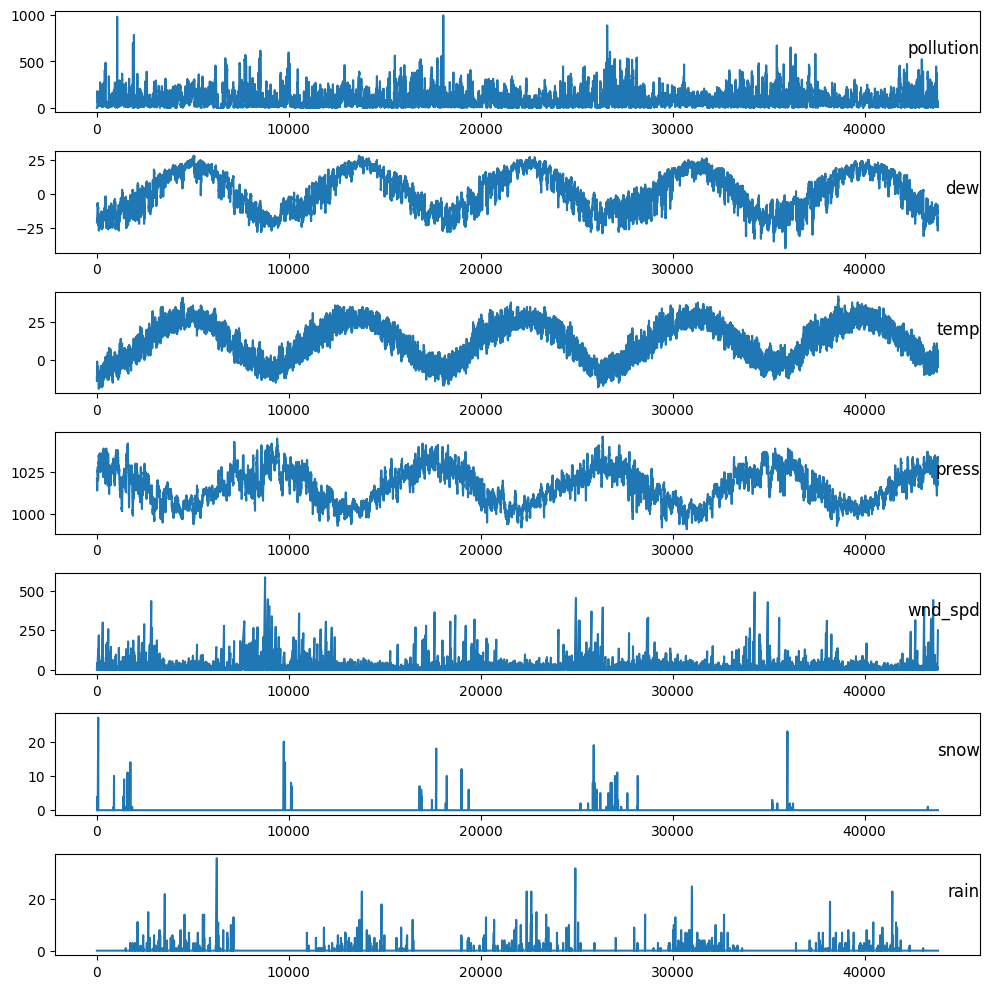

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
values = df.values

# Specify columns to plot
groups = [0, 1, 2, 3, 5, 6, 7]
num_groups = len(groups)

# Create subplots
fig, axes = plt.subplots(num_groups, 1, figsize=(10, 10))

# Plot each column in a separate subplot
for i, group in enumerate(groups):
    ax = axes[i] if num_groups > 1 else axes  # Handle single subplot case
    ax.plot(values[:, group])
    ax.set_title(df.columns[group], y=0.5, loc='right')  # Set subplot title

# Adjust layout and display the plot
fig.tight_layout()
plt.show()

In [30]:
df

,pollution,dew,temp,press,wnd_dir,wnd_spd,snow,rain
datetime,,,,,,,,
2010-01-01 00:00:00,0.0,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,0.0,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,0.0,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,0.0,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,0.0,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-31 19:00:00,8.0,-23,-2.0,1034.0,NW,231.97,0,0
2014-12-31 20:00:00,10.0,-22,-3.0,1034.0,NW,237.78,0,0
2014-12-31 21:00:00,10.0,-22,-3.0,1034.0,NW,242.70,0,0


In [31]:
# prepare data for lstm
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [38]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Function to convert time series data to supervised learning format.
def series_to_supervised(data, n_in = 1, n_out=1, dropnan=True):
    n_vars = 1 if isinstance(data, list) else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = [],[]
    
    # Input sequence (t-n,.... t-1)
    for i in range (n_in, 0, -1):
        cols.append(df.shift(i))
        names +=[('var%d(t-%d)' % (j+1,i)) for j in range(n_vars)]
    
    # Forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    # Concatenate all columns
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
     # Drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

# Load dataset
dataset = df

# Encode categorical data (if any)
encoder = LabelEncoder()
dataset['wnd_dir'] = encoder.fit_transform(dataset['wnd_dir'])

# # Ensure all data is float
# dataset = dataset.astype('float32', errors='ignore')

# dataset = dataset.astype('float32')

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(dataset)

# Frame as supervised learning
reframed = series_to_supervised(scaled,1, 1)

# Drop columns not to be predicted
reframed.drop(reframed.columns[[7,8,9,10,11,12,13]], axis=1, inplace=True)

print(reframed.head())

   var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1        0.0   0.279412   0.131148   0.545455   0.333333   0.002290   
2        0.0   0.279412   0.114754   0.527273   0.333333   0.007639   
3        0.0   0.279412   0.131148   0.509091   0.333333   0.010698   
4        0.0   0.279412   0.081967   0.509091   0.333333   0.016047   
5        0.0   0.294118   0.114754   0.490909   0.333333   0.021396   

   var7(t-1)  var7(t)  var8(t)  
1        0.0      0.0      0.0  
2        0.0      0.0      0.0  
3        0.0      0.0      0.0  
4        0.0      0.0      0.0  
5        0.0      0.0      0.0  


/tmp/ipykernel_33/1928720249.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['wnd_dir'] = encoder.fit_transform(dataset['wnd_dir'])


In [36]:
# Splitting into train and test sets
values = reframed.values  # Convert DataFrame to numpy array
n_train_hours = 1460* 24  # Number of hours for training data (1 year worth of data)

train = values[:n_train_hours, :]  # Select first n_train_hours rows for training
test = values[n_train_hours:, :]   # Select remaining rows for testing


In [33]:

# Split the reframed data into train and test sets
values = reframed.values

# Define the number of hours for training data
n_train_hours = 1460 * 24

# Select the first n_train_hours rows for training, and the remaining for testing
train = values[:n_train_hours, :]
test = values[n_train_hours:, :]

# Split train and test sets into input (X) and output (y)
train_X, train_y = train[:, :-1], train[:, -1]  # Select all columns except the last as input, and the last column as output
test_X, test_y = test[:, :-1], test[:, -1]

# Reshape input data to be 3D [samples, timesteps, features]
# LSTM models in Keras require input data to have a 3D shape
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))  # Reshape training input to (samples, 1, features)
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))     # Reshape testing input to (samples, 1, features)

# Print the shapes of train and test sets
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(35040, 1, 15) (35040,) (8783, 1, 15) (8783,)


2024-04-17 17:08:12.688116: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-17 17:08:12.688276: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-17 17:08:12.855441: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


Epoch 1/50


/opt/conda/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


487/487 - 3s - 7ms/step - loss: 0.0114 - val_loss: 0.0119
Epoch 2/50
487/487 - 1s - 2ms/step - loss: 0.0071 - val_loss: 0.0052
Epoch 3/50
487/487 - 1s - 3ms/step - loss: 0.0063 - val_loss: 0.0047
Epoch 4/50
487/487 - 1s - 3ms/step - loss: 0.0059 - val_loss: 0.0044
Epoch 5/50
487/487 - 1s - 2ms/step - loss: 0.0056 - val_loss: 0.0043
Epoch 6/50
487/487 - 1s - 3ms/step - loss: 0.0052 - val_loss: 0.0043
Epoch 7/50
487/487 - 1s - 3ms/step - loss: 0.0048 - val_loss: 0.0042
Epoch 8/50
487/487 - 2s - 5ms/step - loss: 0.0044 - val_loss: 0.0049
Epoch 9/50
487/487 - 1s - 3ms/step - loss: 0.0039 - val_loss: 0.0031
Epoch 10/50
487/487 - 2s - 5ms/step - loss: 0.0035 - val_loss: 0.0041
Epoch 11/50
487/487 - 1s - 3ms/step - loss: 0.0033 - val_loss: 0.0034
Epoch 12/50
487/487 - 1s - 3ms/step - loss: 0.0032 - val_loss: 0.0026
Epoch 13/50
487/487 - 1s - 3ms/step - loss: 0.0032 - val_loss: 0.0037
Epoch 14/50
487/487 - 1s - 3ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 15/50
487/487 - 3s - 6ms/step - lo

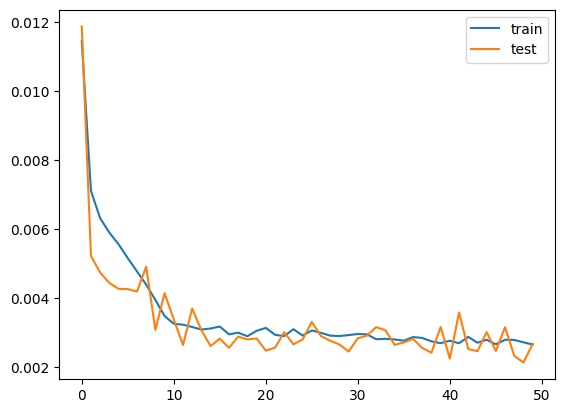

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Design the network
model = Sequential([
    LSTM(8, input_shape=(train_X.shape[1], train_X.shape[2])),
    Dense(1)
])
model.compile(loss='mae', optimizer='adam')

# Fit the network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)

# Plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()